# Pymaceuticals Inc. Analysis

### Summary results of anti-cancer medication on mouses.
1. In our boxplot analysis, it is shown that the treatment using Ramicane and Capomulin are more desirable as compared to using infubino and ceftamin. With the support of line graph on the treatment using Capomulin, the final tumor volume has also decreased drastically over the time period. Both infubino and ceftamin show higher final tumor volume and also extreme outliers depicted in red dot and longer abnormal data ranges shown in whiskers length. 

2. Ramicane would be the best treatment option as its boxplot depicted the data is normally distributed as the median falls in the middle of boxplot. With the combination of mean data shown in our statistical calculation, it also has the lowest mean tumor volume compared to all other treatments.  

3. Besides treatment option, size of mouse is also one of the factor affecting the the tumor sizes. The scatter plot has highly depicted that the larger the mouse, the bigger the tumor sizes. This is further supported with using our correlation calculation that it has a positive correlation for tumor size and weight of mouse. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#study_results.head()
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Combine the data into a single dataset
data = pd.merge(study_results,mouse_metadata, how='left', on="Mouse ID")
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice
len(data["Mouse ID"].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
data[data[["Mouse ID","Timepoint"]].duplicated() ==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup2_mouse = data.loc[data["Mouse ID"] == "g989",:]
dup2_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data =data.loc[data["Mouse ID"] != "g989",:]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
len(clean_data["Mouse ID"].unique())

248

# Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_group = clean_data.groupby(["Drug Regimen"])

mean_tumor = drug_group["Tumor Volume (mm3)"].mean()
#mean_tumor
median_tumor = drug_group["Tumor Volume (mm3)"].median()
#median_tumor
variance_tumor = drug_group["Tumor Volume (mm3)"].var()
#variance_tumor
std_dev_tumor = drug_group["Tumor Volume (mm3)"].std()
#std_dev_tumor
std_err_tumor = drug_group["Tumor Volume (mm3)"].sem()
#std_err_tumor

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean_tumor, "Median Tumor Volume":median_tumor,
                              "Tumor Volume Variance":variance_tumor, "Tumor Volume Std. Dev.": std_dev_tumor,
                             "Tumor Volume Std. Err.":std_err_tumor})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#Summary table of the Stastistics - using aggregation method
tumor_data = clean_data[["Drug Regimen","Tumor Volume (mm3)"]]

summary_stats_agg = tumor_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_stats_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

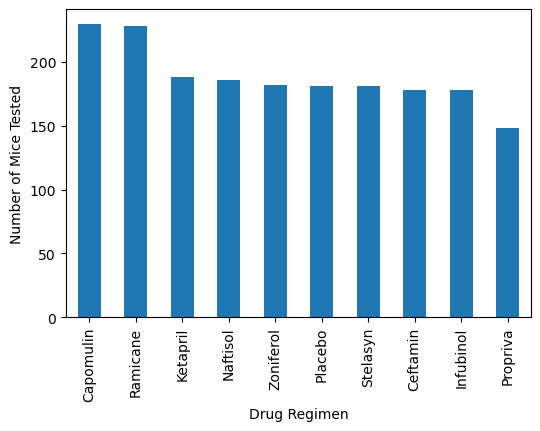

In [11]:
# Generate a bar plot showing the total number of timepoints 
#for all mice tested for each drug regimen using Pandas.

mice_drug = drug_group["Timepoint"].count()
mice_drug = mice_drug.sort_values(ascending=False)

mice_drug.plot(kind="bar", figsize=(6,4))
plt.ylabel("Number of Mice Tested")

plt.show() 

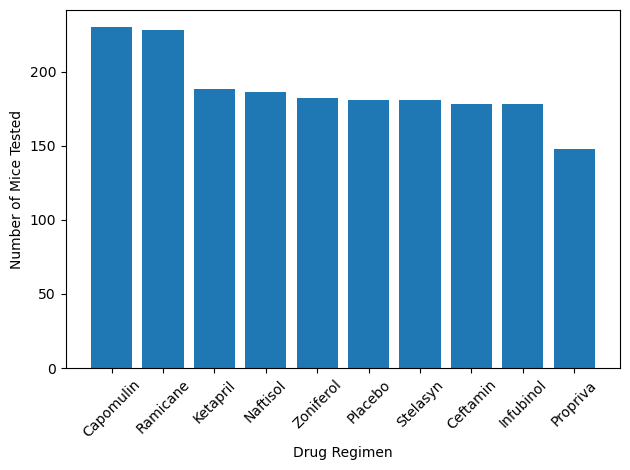

In [12]:
# Generate a bar plot showing the total number of timepoints
#for all mice tested for each drug regimen using pyplot.

mice_drug_df = pd.DataFrame(drug_group[["Timepoint"]].count())
mice_drug_df = mice_drug_df["Timepoint"].sort_values(ascending = False)
mice_drug_index_df = mice_drug_df.reset_index()
# mice_drug_index_df

x_axis = np.arange(len(mice_drug_index_df))

plt.bar(x_axis,mice_drug_index_df["Timepoint"])

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

tick_locations = [values for values in x_axis]
plt.xticks(tick_locations,mice_drug_index_df["Drug Regimen"], rotation=45)

plt.tight_layout()
plt.show()

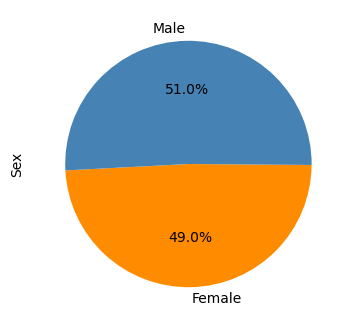

In [13]:
# Generate a pie plot showing the distribution of 
#female versus male mice using Pandas

sex_group = clean_data.groupby("Sex")
mice_sex = sex_group["Sex"].count()

sex_pie = mice_sex.plot(kind="pie", y=mice_sex, autopct="%1.1f%%", 
                        startangle=183, colors=['darkorange','steelblue'], figsize=(4,4))

sex_pie.set_ylabel("Sex")
plt.show()

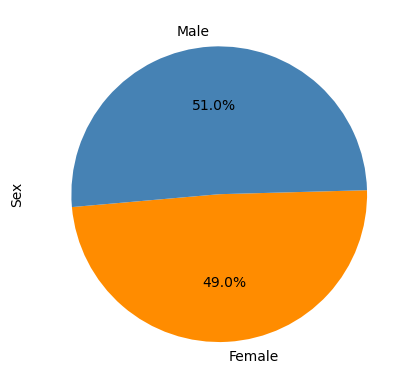

In [14]:
# Generate a pie plot showing the distribution of 
#female versus male mice using pyplot
sex_group = clean_data.groupby("Sex")
mice_sex = sex_group["Sex"].count()
#mice_sex
mice_name = mice_sex.index.get_level_values('Sex')

plt.pie(mice_sex, labels=mice_name , autopct="%1.1f%%", 
                        startangle=185, colors=['darkorange','steelblue'])

plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers, and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#new_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")|
                          #(clean_data["Drug Regimen"] =="Ramicane")|
                         #(clean_data["Drug Regimen"] == "Infubinol")|
                        #(clean_data["Drug Regimen"] == "Ceftamin"),:]
#new_data = new_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean_data.groupby(["Drug Regimen","Mouse ID"])

max_time = mouse_group[["Timepoint","Tumor Volume (mm3)"]].last()

mouse_max = max_time.reset_index()
mouse_max
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_final_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    
for drug in treatments:
    
    tumor_final= mouse_max.loc[mouse_max["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    tumor_final_data.append(tumor_final)
    
    
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    quartiles = tumor_final.quantile([0.25,0.5,0.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    median = {quartiles[0.5]}
    lower_bound= lowerq-(1.5*iqr)
    upper_bound= upperq-(1.5*iqr)
    
#     print(f"outliers are below {lower_bound} and above {upper_bound}")

    # Determine outliers using upper and lower bounds
    
    outliers = tumor_final.loc[(tumor_final < lower_bound) |
                           (tumor_final > upper_bound)]
    
    if drug == treatments[0]:
        capomulin_outliers  = outliers
        print(f"Capomulin's potential outliers:{capomulin_outliers}")
        
    elif drug == treatments[1]:
        ramicane_outliers  = outliers
        print(f"Ramicane's potential outliers:  {ramicane_outliers}")
        
    elif drug == treatments[2]:
        infubinol_outliers  = outliers
        print(f"Infubinol's potential outliers:  {infubinol_outliers}")
        
    elif drug == treatments[3]:  
        ceftamin_outliers  = outliers
        print(f"Ceftamin's potential outliers:  {ceftamin_outliers}")
    else:
        print()

Capomulin's potential outliers:0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
12    33.329098
13    46.539206
14    32.377357
15    41.581521
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
24    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:  174    38.407618
175    43.047543
176    38.810366
177    32.978522
178    38.342008
179    33.397653
180    37.311236
181    40.659006
182    29.128472
183    33.562402
184    36.374510
185    31.560470
186    36.134852
188    30.564625
189    31.095335
190    45.220869
191    36.561652
192    37.225650
193    43.419381
194    30.276232
195    40.667713
196    43.166373
197    44.183451
198    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers:  50    67.973419
51    65.525743
52    57.031862
53    66.08306

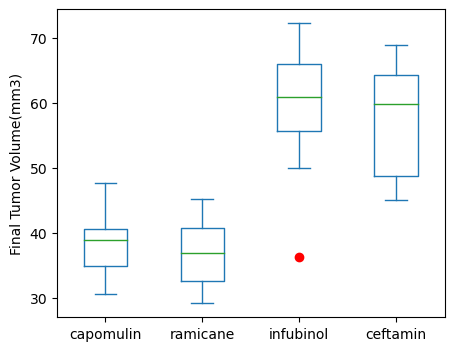

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_outliers_df = pd.DataFrame({"capomulin":capomulin_outliers, 
                                  "ramicane":ramicane_outliers,
                                 "infubinol":infubinol_outliers,
                                 "ceftamin":ceftamin_outliers})
# tumor_outliers_df 
ax =tumor_outliers_df[["capomulin", "ramicane","infubinol","ceftamin"]].plot(kind='box',figsize=(5,4),sym="ro")
              
plt.ylabel("Final Tumor Volume(mm3)")

plt.show()


# Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_capo =clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
#mouse_capo

mouse_capo["Mouse ID"].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

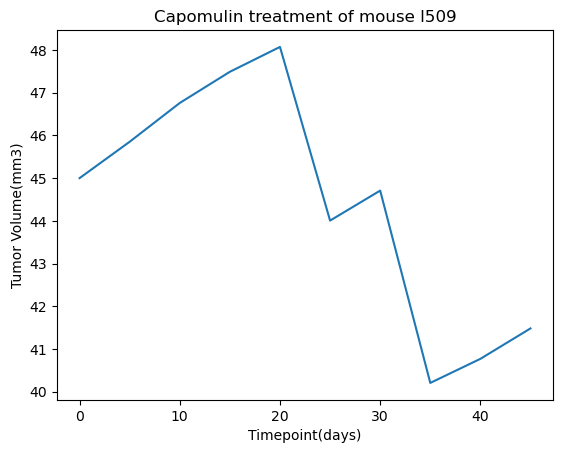

In [19]:
mouse_l509 = mouse_capo.loc[mouse_capo["Mouse ID"] == "l509",:]

plt.plot(mouse_l509 ["Timepoint"], mouse_l509 ["Tumor Volume (mm3)"])

plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume(mm3)")
plt.xlabel("Timepoint(days)")
plt.show()

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mice_group = mouse_capo.groupby(["Mouse ID"])

tumor_avg = mice_group[["Tumor Volume (mm3)","Weight (g)"]].mean()
tumor_avg.head()

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0


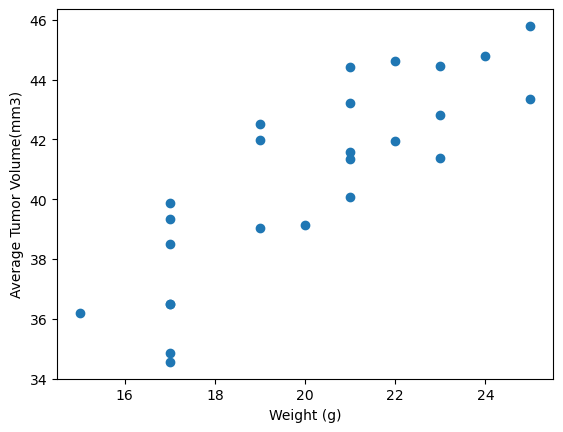

In [21]:
plt.scatter(tumor_avg["Weight (g)"],tumor_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()

# Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(tumor_avg["Weight (g)"],tumor_avg["Tumor Volume (mm3)"])
print(f" The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")                                                       


 The correlation between mouse weight and the average tumor volume is 0.84


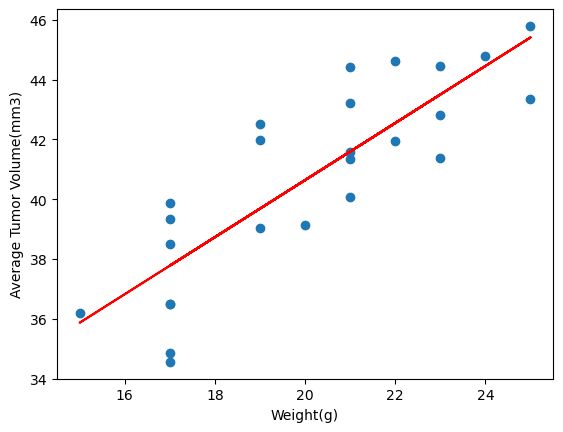

In [23]:
#Linear Regression
x = tumor_avg["Weight (g)"]
y = tumor_avg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = (x*slope) + intercept

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()